<a href="https://colab.research.google.com/github/kdats/object_detection_detectron2/blob/main/detectron_object_det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Cuda is not showing on your notebook because you have not enabled GPU in Colab.

# The Google Colab comes with both options GPU or without GPU. You can enable or disable GPU in runtime settings

# Go to Menu > Runtime > Change runtime.
# Change hardware acceleration to GPU.

# GPU Settings Screenshot

# To check if GPU is running or not, run the following command

!nvidia-smi

Tue Nov 29 08:41:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ef1v47__
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ef1v47__
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 151 kB 69.0 MB/s 
     |████████████████████████████████| 1.4 MB 52.5 MB/s 
     |████████████████████████████████| 549 kB 62.1 MB/s 
     |████████████████████████████████| 248 kB 75.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 843 kB 49.0 MB/s 
     |████████████████████████████████| 96 kB 6.4 MB/s 
     |████████████████████████████████| 117 kB 70.0 MB/s 
     |████████

In [4]:
# Load an image
folder = "/content/drive/MyDrive/object_detection_validate"
import cv2

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_COLOR)
        if img is not None:
            images.append(img)
    return images
image_list_to_validate = load_images_from_folder(folder)

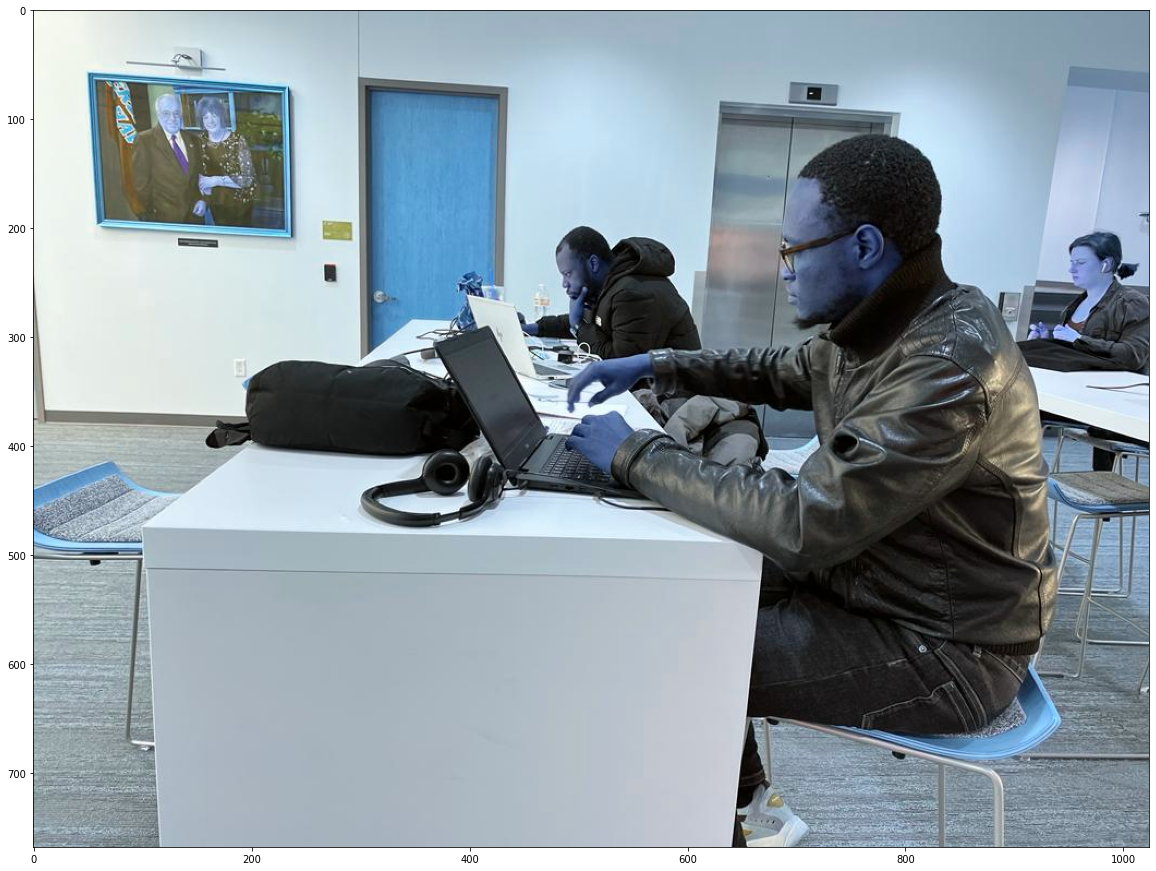

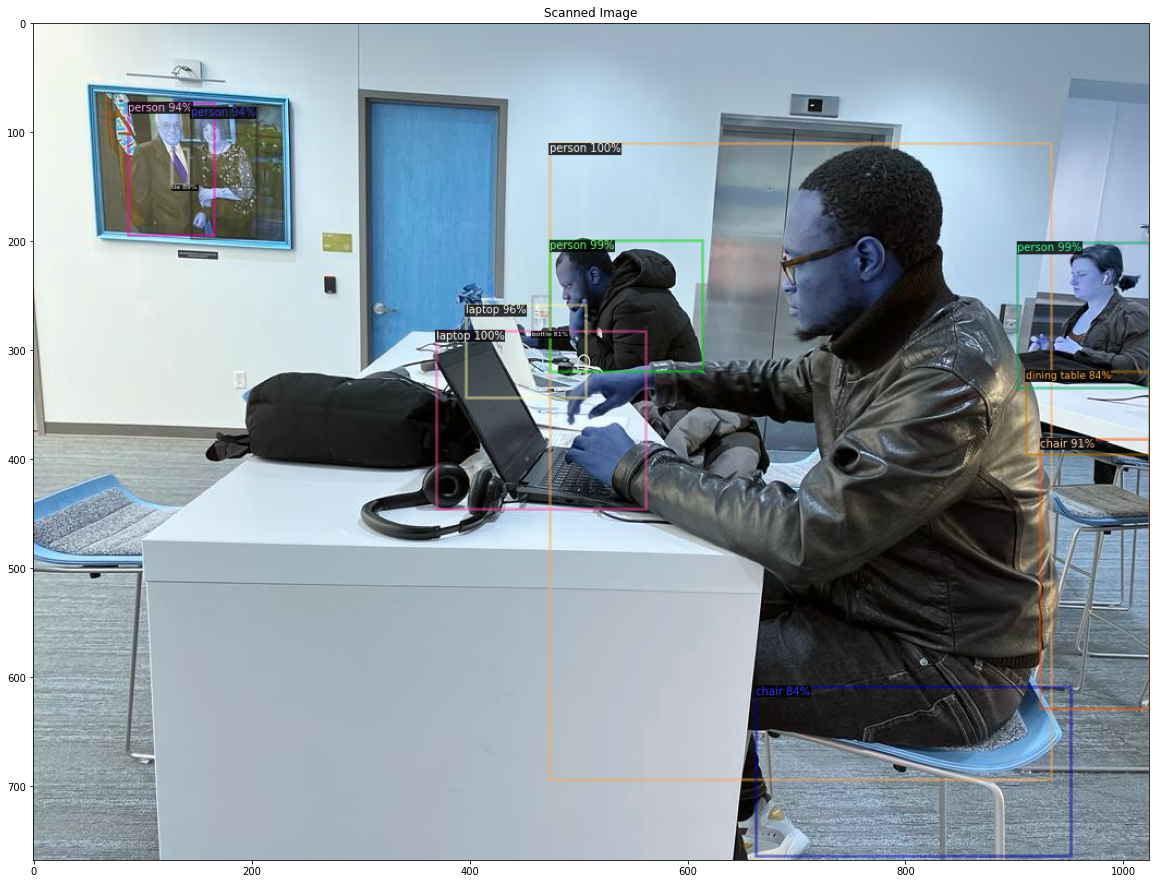

In [17]:
from detectron2.engine.defaults import *
from detectron2.config import *
from detectron2.model_zoo import model_zoo
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.data import MetadataCatalog
import numpy as np
import requests
import cv2
import os
from matplotlib import pyplot as plt

# res = requests.get("https://thumbor.forbes.com/thumbor/fit-in/1200x0/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5f15af31465263000625ce08%2F0x0.jpg")
# image = np.asarray(bytearray(res.content), dtype="uint8")
# image = cv2.imdecode(image, cv2.IMREAD_COLOR)
for image in image_list_to_validate:
  config_file = 'COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'
  cfg = get_cfg()
  cfg.merge_from_file(model_zoo.get_config_file(config_file))
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75 # Threshold
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_file)
  cfg.MODEL.DEVICE = "cuda" # cpu or cuda

  predictor = DefaultPredictor(cfg)

  # Make prediction
  output = predictor(image)
  # print(output)
  v = Visualizer(image[:, :, ::-1],
                scale=1,
                metadata=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
                instance_mode=ColorMode.IMAGE
                )
  fig = plt.figure(figsize=(20, 20))
  # columns = 2
  # rows = 1
  # fig.add_subplot(rows, columns, 1)
  plt.imshow(image)
  plt.show()
 
  v = v.draw_instance_predictions(output["instances"].to("cpu"))
  plt.figure(figsize = (20,20))
  plt.imshow(v.get_image()[:, :, ::-1])
  plt.title(f'Scanned Image')
  w = 50
  h = 50
  break